# E-Commerce: Product Range Analysis 

**The purpose of the project:**

- **To learn the range of products, what products does the store have to offer and how are they sold?**


- **What are the popular products and what are not.**


- **Which products yield the greatest profit.**


- **Which products are usually sold together.**

### The basis of the analysis should be the fact that the recommendations are aimed to store manager so that he can change or improve the range of products.

# Decomposition:

## - EDA 
- **Checking for missing and duplicate values, adjusting the data types to facilitate the analysis process, general information about our data.**

## - Analyze the product range

- **We will check distribution by products, what sells more and what less, and in addition we will categorize the products to check if there is a leading category and if so what it is and how to possibly expand the products in that category, or perhaps reduce products in an unpopular category to free up resources for products in another popular category.**



- **We will also make a distribution by date, we will check time patterns and try to find out what are the times when sales increase and where they actually decrease.**


## - Formulate and test statistical hypotheses

-  **Will expanding the range of products in a category that is considered popular result in an increase in sales?**

- **Should unprofitable products be dropped?**

## - Conclusion and Recomendation


##   Downloading data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import display
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly import graph_objects as go
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import sidetable
import scipy.stats as stats
        
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

In [2]:
data = pd.read_csv('C:\\Users\\evyke\\OneDrive\\Desktop\\projects\\Final_Project\\ecommerce_dataset_us.csv', sep='\t', parse_dates=['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [5]:
#function to calculate missing values and duplicates 
def check(df):
    print('_____________________________________')
    print('MISSING VALUES:')
    print(df.isna().sum())
    print('______________________________________')
    print('SHARE OF MISSING VALUES (%):')
    print(round(((df.isnull().sum()/len(df))*100),2))
    print('______________________________________')
    print('DUPLICATES:')
    print(df.duplicated().sum()) 

In [6]:
check(data)

_____________________________________
MISSING VALUES:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64
______________________________________
SHARE OF MISSING VALUES (%):
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
dtype: float64
______________________________________
DUPLICATES:
5268


In [7]:
data = data.drop_duplicates()

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.InvoiceDate.describe()

count                  536641
unique                  23260
top       2019-10-29 14:41:00
freq                     1114
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: InvoiceDate, dtype: object

In [10]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
dtype: int64

## data overview:
 
- the mean and the standart deviaton(std) in quantity are so far from each other, which is mean we have some big orders contains  a large amount of items and probably impact directly affects the price, so the same phenomenon happens there as well.

- we have 25900 orders and 4372 customers.

- our range time is 2018-11-29 / 2019-12-07(1y,9d). the most popular day is 2019-19-29. this data will be usefull for seasons investigation.

## missing and duplicates:

- 135080 values are missing the in CustomerID field (24.93% in total)

- 1454 values are missing in the Description field (0.27% in total)

now im going over the columns that need to be chacked.

# Preprocessing data and EDA

In [11]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141153,548502,22730,ALARM CLOCK BAKELIKE IVORY,1,2019-03-29 14:17:00,8.29,NaN
384209,570111,23423,PANTRY 3 HOOK ROLLING PIN HANGER,1,2019-10-05 12:28:00,3.75,15005.0
306792,563844,23075,PARLOUR CERAMIC WALL HOOK,4,2019-08-17 14:04:00,4.15,17725.0
203005,554511,22712,CARD DOLLY GIRL,3,2019-05-22 15:52:00,0.83,NaN
393264,570818,22579,WOODEN TREE CHRISTMAS SCANDINAVIAN,6,2019-10-10 12:47:00,0.29,17841.0
421154,572921,21981,PACK OF 12 WOODLAND TISSUES,6,2019-10-24 16:57:00,0.39,15993.0
321519,565150,22295,HEART FILIGREE DOVE LARGE,24,2019-08-30 14:26:00,1.45,14298.0
453416,575481,21158,MOODY GIRL DOOR HANGER,6,2019-11-07 16:28:00,0.39,15679.0
154597,549929,22712,CARD DOLLY GIRL,12,2019-04-11 10:32:00,0.42,13740.0
400903,571408,23168,CLASSIC CAFE SUGAR DISPENSER,1,2019-10-15 12:22:00,1.25,15012.0


In [12]:
data[data['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0


##  Missing values in CustomerID column

In [13]:
data[data['CustomerID'].isna()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540756,581492,20659,ECONOMY LUGGAGE TAG,7,2019-12-07 10:03:00,2.46,NaN
316539,564754,20711,JUMBO BAG TOYS,1,2019-08-28 10:29:00,4.13,NaN
10286,537237,21175,GIN + TONIC DIET METAL SIGN,6,2018-12-04 09:58:00,4.21,NaN
138097,548191,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2019-03-27 15:20:00,7.46,NaN
39974,539718,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-12-19 13:06:00,5.06,NaN
136444,547964,22424,ENAMEL BREAD BIN CREAM,2,2019-03-26 15:45:00,24.96,NaN
243884,558475,21619,4 VANILLA BOTANICAL CANDLES,2,2019-06-27 15:58:00,2.46,NaN
13429,537434,21891,TRADITIONAL WOODEN SKIPPING ROPE,4,2018-12-04 16:57:00,2.51,NaN
351385,567665,82583,HOT BATHS METAL SIGN,1,2019-09-19 15:22:00,4.13,NaN
474405,576840,23221,REINDEER HEART DECORATION SILVER,1,2019-11-14 15:23:00,1.63,NaN


I do not recognize any repeating pattern and therefore I cannot fill them with other truth values, on the other hand I will not delete them, for further analysis purposes.
How did it happen? There can be many technical reasons that the information is not saved well, or unregistered customers who have made purchases.

In [14]:
data['CustomerID'] = data['CustomerID'].fillna('unknwon')

## UnitPrice columns

What can be a problem with this field are negative values and zero, let's check

In [15]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,unknwon
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,unknwon


According to what is detailed in the description, these are debt payments, and they have nothing to do with the purposes of our analysis, so we will delete them.

In [16]:
data[data['UnitPrice']==0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
14066,537455,22155,NaN,-70,2018-12-05 09:31:00,0.0,unknwon
313648,564530,22677,FRENCH BLUE METAL DOOR SIGN 2,4,2019-08-23 14:57:00,0.0,unknwon
246903,558743,35810B,NaN,-4,2019-06-29 15:56:00,0.0,unknwon
104411,545176,22300,COFFEE MUG DOG + BALL DESIGN,1,2019-02-26 14:19:00,0.0,unknwon
14065,537454,21349,NaN,-44,2018-12-05 09:30:00,0.0,unknwon
14369,537534,22620,4 TRADITIONAL SPINNING TOPS,1,2018-12-05 11:48:00,0.0,unknwon
357370,568090,20793,NaN,-5,2019-09-21 14:41:00,0.0,unknwon
124020,546933,21556,CERAMIC STRAWBERRY MONEY BOX,2,2019-03-16 11:02:00,0.0,unknwon
121360,546756,79067,NaN,-5,2019-03-14 13:31:00,0.0,unknwon
221959,556299,21937,?,-161,2019-06-08 10:17:00,0.0,unknwon


You can see that these lines have something in common with the missing values in "Description".

In [17]:
len(data[data['UnitPrice']==0])

2510

negative values and zero prices affected on revenue, and our main goals is to analyze the rang product, so those rows should be removed.(2512 rows)

In [18]:
data = data.query('UnitPrice > 0')

## Quantity column

In [19]:
data.query('Quantity <= 0').sort_values(by='Quantity', ascending = True).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2018-11-30 14:23:00,0.03,15838.0
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2019-04-16 13:08:00,2.10,15749.0
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2019-04-16 13:08:00,1.85,15749.0
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2019-04-16 13:08:00,2.55,15749.0
224419,C556522,22920,HERB MARKER BASIL,-1515,2019-06-11 11:21:00,0.55,16938.0
187609,C552995,M,Manual,-1350,2019-05-10 15:19:00,0.16,18133.0
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2019-04-16 13:08:00,2.55,15749.0
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2019-10-09 11:10:00,1.06,16029.0


its seen tjat all negative quantity is return transaction, cuz all invoiceNo are with 'C' and thats stand for "correction".
any way, my opinion is thats rows are imported for understending why peploe returned them? so lets keep them and remove them from our datasets. 

In [20]:
returned = data.query('Quantity <= 0')
len(returned)

9251

In [21]:
data = data.query('Quantity > 0')

# StockCode

Apparently, product code names should contain only numbers or letters and numbers together. Let's try to find the exceptions that contain only letters.

In [22]:
sorted(data['StockCode'].unique().tolist(), reverse = True)[0:22]

['m',
 'gift_0001_50',
 'gift_0001_40',
 'gift_0001_30',
 'gift_0001_20',
 'gift_0001_10',
 'S',
 'POST',
 'PADS',
 'M',
 'DOT',
 'DCGSSGIRL',
 'DCGSSBOY',
 'DCGS0076',
 'DCGS0070',
 'DCGS0069',
 'DCGS0004',
 'DCGS0003',
 'C2',
 'BANK CHARGES',
 'B',
 'AMAZONFEE']

These lines do not seem to be related to the sale or transaction more like operating expenses so I will delete them.

In [23]:
irelevant_transaction = ['m',
 'gift_0001_50',
 'gift_0001_40',
 'gift_0001_30',
 'gift_0001_20',
 'gift_0001_10',
 'S',
 'POST',
 'PADS',
 'M',
 'DOT',
 'DCGSSGIRL',
 'DCGSSBOY',
 'DCGS0076',
 'DCGS0070',
 'DCGS0069',
 'DCGS0004',
 'DCGS0003',
 'C2',
 'BANK CHARGES',
 'B',
 'AMAZONFEE']

for word in irelevant_transaction:
    data = data[~data['StockCode'].str.contains(word)]

## Description 

In [24]:
#cheacking missing value in this field
data['Description'].isna().sum()

0

At first we saw that there were missing values in this field (scroll up to the beginning of the notebook), now you can see that they have disappeared, and this is because in previous steps we deleted rows with negative or zero values and they disappeared along with them.

In [25]:
#looking for desription sales in lowercase
data[data['Description'].str.islower()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


We also see the same principle regarding the descriptions that appeared in small letters that are no longer in the dataset, this is because they were removed together with the rows that had zero values in the price field because they were not rows that record a normal transaction but all kinds of returns or other expenses that are not a sale.

# adding fields

## Revenue  

In [26]:
data['Revenue'] = data.Quantity * data.UnitPrice
data['Revenue'].sum()

9951923.860000001

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0,15.30


## Month and Date

In [28]:
data['Month'] = data['InvoiceDate'].dt.strftime('%Y-%m')
data['Date'] = data['InvoiceDate'].dt.floor('d')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,2018-11,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11,2018-11-29
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850.0,15.30,2018-11,2018-11-29


# Distribution and Outliers

In [29]:
# This function will show us the extreme values from below and above.

def eda(column):
    lower_limit = np.percentile(data[column], 2)
    upper_limit = np.percentile(data[column], 98)
    print('Limits for column:', column)
    print()
    print('lower_limit:',lower_limit)
    print('upper_limit:',upper_limit)

## Quantity

In [30]:
data.Quantity.describe()

count    506794.000000
mean         10.676886
std         158.913888
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [31]:
eda('Quantity')

Limits for column: Quantity

lower_limit: 1.0
upper_limit: 72.0


Now we will explore the extreme values

In [32]:
quant_out = data.query('Quantity < 1 or Quantity > 72')
quant_out.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2018-11-29 09:00:00,2.55,13748.0,204.00,2018-11,2018-11-29
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2018-11-29 09:37:00,0.42,14688.0,50.40,2018-11,2018-11-29
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2018-11-29 09:57:00,1.65,16029.0,165.00,2018-11,2018-11-29
178,536387,79321,CHILLI LIGHTS,192,2018-11-29 09:58:00,3.82,16029.0,733.44,2018-11,2018-11-29
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2018-11-29 09:58:00,3.37,16029.0,647.04,2018-11,2018-11-29


In [33]:
quant_out.sort_values(by='Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
447034,574941,22469,HEART OF WICKER SMALL,73,2019-11-05 17:42:00,3.95,unknwon,288.35,2019-11,2019-11-05
467799,576365,22142,CHRISTMAS CRAFT WHITE FAIRY,73,2019-11-12 17:55:00,3.95,unknwon,288.35,2019-11,2019-11-12
446979,574941,23366,SET 12 COLOURING PENCILS DOILY,73,2019-11-05 17:42:00,1.50,unknwon,109.50,2019-11,2019-11-05
67044,541827,20717,STRAWBERRY SHOPPER BAG,73,2019-01-19 17:05:00,0.83,unknwon,60.59,2019-01,2019-01-19
503929,578940,22355,CHARLOTTE BAG SUKI DESIGN,74,2019-11-25 13:18:00,2.46,unknwon,182.04,2019-11,2019-11-25


In [34]:
quant_out.sort_values(by='Quantity',ascending = False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0,168469.60,2019-12,2019-12-07
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,77183.60,2019-01,2019-01-16
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0,1008.00,2019-10,2019-10-25
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135.0,3096.00,2019-05,2019-05-25
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2019-02-20 10:43:00,0.82,18087.0,3202.92,2019-02,2019-02-20
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2019-07-17 17:04:00,0.06,14609.0,191.16,2019-07,2019-07-17
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-01-09 12:55:00,2.10,15749.0,6539.40,2019-01,2019-01-09
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-04-16 13:20:00,2.10,15749.0,6539.40,2019-04,2019-04-16
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2019-10-31 11:24:00,0.32,16308.0,960.00,2019-10,2019-10-31
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2019-08-02 18:06:00,1.45,12931.0,4176.00,2019-08,2019-08-02


In [35]:
quant_out.CustomerID.nunique()/len(quant_out)

0.11282467532467533

**Immediate conclusion**: 
there are no specific customers who make the big purchases. So there is nothing to invest in finding    the most profitable customers, there are too many of them.

In [36]:
print('the precentage of quantity outliers from all dataset is: {:.2%}'.format(len(quant_out)/len(data)))

the precentage of quantity outliers from all dataset is: 1.70%


this is small precentage and could be removed, but lets see how much ther share from revenue.

In [37]:
print('Quantity outliers % in Revenue: {:.2%}'.format(quant_out['Revenue'].sum()/data['Revenue'].sum()))

Quantity outliers % in Revenue: 24.45%


wow! its a big share. so i will not removed them.

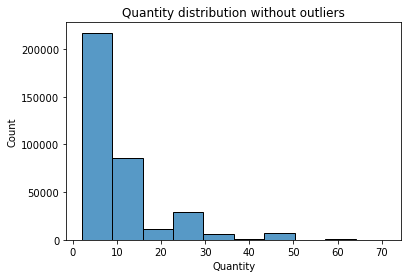

In [38]:
sns.histplot(data.query('1 < Quantity < 72')['Quantity'], bins=10)
plt.title('Quantity distribution without outliers')
plt.show()

## UnitPrice

In [39]:
data.UnitPrice.describe()

count    506794.000000
mean          3.282790
std           4.435501
min           0.040000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

In [40]:
eda('UnitPrice')

Limits for column: UnitPrice

lower_limit: 0.39
upper_limit: 12.75


In [41]:
UnitPrice_out = data.query('UnitPrice < 0.39 or UnitPrice > 12.75')
UnitPrice_out.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2018-11-29 09:45:00,14.95,16098.0,29.90,2018-11,2018-11-29
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,2018-11-29 09:45:00,14.95,16098.0,29.90,2018-11,2018-11-29
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4,2018-11-29 09:45:00,16.95,16098.0,67.80,2018-11,2018-11-29
168,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,2018-11-29 09:56:00,19.95,17420.0,19.95,2018-11,2018-11-29
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,2018-11-29 10:19:00,0.10,17511.0,28.80,2018-11,2018-11-29


In [42]:
UnitPrice_out.sort_values(by ='UnitPrice').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
229052,557009,16045,POPART WOODEN PENCILS ASST,100,2019-06-14 11:38:00,0.04,14321.0,4.0,2019-06,2019-06-14
325878,565460,16045,POPART WOODEN PENCILS ASST,100,2019-09-03 09:24:00,0.04,16843.0,4.0,2019-09,2019-09-03
235392,557639,16045,POPART WOODEN PENCILS ASST,100,2019-06-19 16:13:00,0.04,12933.0,4.0,2019-06,2019-06-19
506043,579124,16045,POPART WOODEN PENCILS ASST,100,2019-11-26 12:14:00,0.04,15721.0,4.0,2019-11,2019-11-26
344823,567102,16045,POPART WOODEN PENCILS ASST,500,2019-09-14 13:32:00,0.04,14124.0,20.0,2019-09,2019-09-14
477440,577057,16045,POPART WOODEN PENCILS ASST,100,2019-11-15 14:26:00,0.04,12748.0,4.0,2019-11,2019-11-15
484163,577522,16045,POPART WOODEN PENCILS ASST,100,2019-11-18 13:23:00,0.04,15988.0,4.0,2019-11,2019-11-18
468553,576513,16045,POPART WOODEN PENCILS ASST,100,2019-11-13 12:10:00,0.04,14715.0,4.0,2019-11,2019-11-13
334170,566233,16045,POPART WOODEN PENCILS ASST,100,2019-09-09 11:04:00,0.04,12635.0,4.0,2019-09,2019-09-09
434038,574025,16045,POPART WOODEN PENCILS ASST,100,2019-10-31 12:26:00,0.04,12748.0,4.0,2019-10,2019-10-31


In [43]:
UnitPrice_out.sort_values(by ='UnitPrice',ascending=False).head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.5,15098.0,649.5,2019-06,2019-06-08
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.5,15098.0,38970.0,2019-06,2019-06-08
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2019-01-08 14:57:00,295.0,17406.0,295.0,2019-01,2019-01-08
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-04-26 12:22:00,295.0,14973.0,295.0,2019-04,2019-04-26
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2019-05-24 16:25:00,295.0,13015.0,295.0,2019-05,2019-05-24
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2018-11-30 18:06:00,295.0,13145.0,295.0,2018-11,2018-11-30
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-12 11:38:00,295.0,13452.0,295.0,2019-03,2019-03-12
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2018-12-14 08:41:00,295.0,16607.0,295.0,2018-12,2018-12-14
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2019-02-02 15:32:00,295.0,14842.0,295.0,2019-02,2019-02-02
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2019-03-23 14:19:00,295.0,13452.0,295.0,2019-03,2019-03-23


In [44]:
print('the precentage of UnitPrice outliers from all dataset is: {:.2%}'.format(len(UnitPrice_out)/len(data)))

the precentage of UnitPrice outliers from all dataset is: 3.82%


In [45]:
print('UnitPrice outliers % in Revenue: {:.2%}'.format(UnitPrice_out['Revenue'].sum()/data['Revenue'].sum()))

UnitPrice outliers % in Revenue: 5.24%


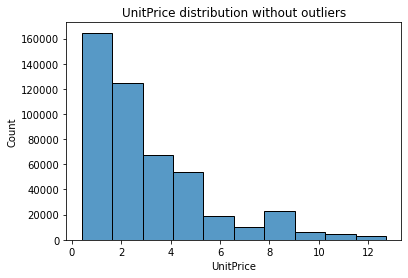

In [46]:
sns.histplot(data.query('0.39 < UnitPrice < 12.75')['UnitPrice'], bins=10)
plt.title('UnitPrice distribution without outliers')
plt.show()

## Revenue

In [47]:
data.Revenue.describe()

count    506794.000000
mean         19.637020
std         273.879329
min           0.060000
25%           3.900000
50%           9.950000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64

In [48]:
eda('Revenue')

Limits for column: Revenue

lower_limit: 0.83
upper_limit: 112.5


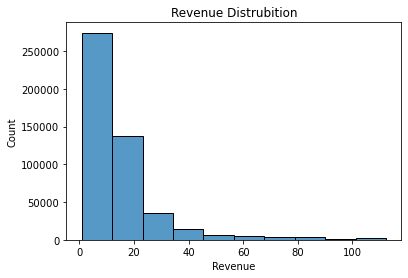

In [49]:
sns.histplot(data.query('0.83 < Revenue < 112.5')['Revenue'], bins=10)
plt.title('Revenue Distrubition')
plt.show()

## preprocess summary

- We identified invoices that are actually refund/cancellation of transaction (C) and removed them along with the lines where a negative price and quantity appeared.


- Customers who did not have an ID number filled in 'unknwon'.


- We located the unusual code names of the products and removed them. 

- For example, commissions for sales websites, gift cards, etc.


- We added a profit column, date day - month - year, month.


- We presented the exceptions in the three numerical columns (income, quantity, price unit).

- And since the exceptions were a large percentage of the income, it was decided to keep them and not delete them.

- We removed about 8% rows from the original dataset.

# Categorization

## price range categories

In [50]:
print("25% price range:",np.percentile(data['UnitPrice'], 25))
print("50% price range:",np.percentile(data['UnitPrice'], 50))
print("75% price range:",np.percentile(data['UnitPrice'], 75))
print("95% price range:",np.percentile(data['UnitPrice'], 95))

25% price range: 1.25
50% price range: 2.08
75% price range: 4.13
95% price range: 9.95


In [51]:
price_ranges = {
    (0, 0): 'free',
    (0, 1.25): 'low',
    (1.25, 2.07): 'medium',
    (2.07, 4.13): 'high medium',
    (4.13, 9.94): 'high',
    (9.94, float('inf')): 'elite'
}

def price_cat(i):
    for (start, end), label in price_ranges.items():
        if start < i <= end:
            return label 


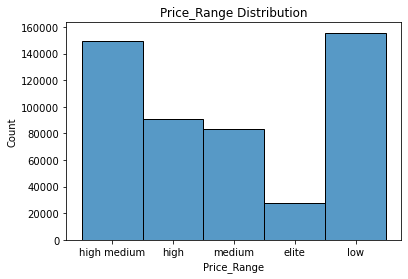

In [52]:
data['Price_Range'] = data['UnitPrice'].apply(price_cat)
sns.histplot(data['Price_Range'],bins=10)
plt.title('Price_Range Distribution')
plt.show()

## RFM

Recency (R) - the time that has passed since the customer made the last purchase.

Frequency (F) - how many total purchases the customer made.

Monetary (M) - the total amount of the customer's purchases in the business.

In [53]:
# removing uncompleted month to invoid negative values in the "recency" column.
data=data.query('InvoiceDate > "2018-12-01" and InvoiceDate < "2019-12-01"')

In [54]:
data['Date'].max()

Timestamp('2019-11-30 00:00:00')

In [55]:
last_date=dt.datetime(2019,11,30)
last_date

datetime.datetime(2019, 11, 30, 0, 0)

In [56]:
rfm=data.groupby('Description').agg({
    'Date': lambda x: (last_date-x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue':'sum'
}).reset_index()
rfm.rename(columns={'Date':'recency',
                    'InvoiceNo':'frequency',
                    'Revenue':'monetary'},inplace=True)
rfm.head(10)

,Description,recency,frequency,monetary
0,50'S CHRISTMAS GIFT BAG LARGE,0,119,2286.45
1,DOLLY GIRL BEAKER,0,164,2822.70
2,I LOVE LONDON MINI BACKPACK,1,79,1499.57
3,I LOVE LONDON MINI RUCKSACK,57,1,4.15
4,NINE DRAWER OFFICE TIDY,1,29,789.77
5,OVAL WALL MIRROR DIAMANTE,0,150,2336.40
6,RED SPOT GIFT BAG LARGE,1,94,2001.25
7,SET 2 TEA TOWELS I LOVE LONDON,162,257,7946.33
8,SPACEBOY BABY GIFT SET,0,174,7598.42
9,TOADSTOOL BEDSIDE LIGHT,170,1,17.90


Now I'm going to make this metric simpler and more useful. The numbers from 1-4 symbolize the level of value, the frequency, and the most recently bought in descending order.

In [57]:
rfm['R']=pd.qcut(rfm.recency,5,[1,2,3,4],duplicates = 'drop')
rfm['F']=pd.qcut(rfm.frequency,4,[4,3,2,1])
rfm['M']=pd.qcut(rfm.monetary,4,[4,3,2,1])
rfm.head()

,Description,recency,frequency,monetary,R,F,M
0,50'S CHRISTMAS GIFT BAG LARGE,0,119,2286.45,1,2,1
1,DOLLY GIRL BEAKER,0,164,2822.70,1,1,1
2,I LOVE LONDON MINI BACKPACK,1,79,1499.57,1,2,2
3,I LOVE LONDON MINI RUCKSACK,57,1,4.15,3,4,4
4,NINE DRAWER OFFICE TIDY,1,29,789.77,1,3,2


dividing the data into segment.

In [58]:
def rfm_name(row):
    
    if row['R'] == 1:
        r_name = 'recent'
    if row['R'] == 2:
        r_name = 'less recent'
    if row['R'] == 3:
        r_name = 'old'
    if row['R'] == 4:
        r_name = 'oldest'
    
    if row['F'] == 1:
        f_name = 'top seller'
    if row['F'] == 2:
        f_name = 'popular'
    if row['F'] == 3:
        f_name = 'unpopular'
    if row['F'] == 4:
        f_name = 'rare'
        
    if row['M'] == 1:
        m_name = 'best value'
    if row['M'] == 2:
        m_name = 'good value'
    if row['M'] == 3:
        m_name = 'low value'
    if row['M'] == 4:
        m_name = 'cheap'
    
    return r_name + " / " + f_name + " / " + m_name
 

In [59]:
rfm['RFM_segment'] = rfm.apply(rfm_name, axis=1)
rfm.head()

,Description,recency,frequency,monetary,R,F,M,RFM_segment
0,50'S CHRISTMAS GIFT BAG LARGE,0,119,2286.45,1,2,1,recent / popular / best value
1,DOLLY GIRL BEAKER,0,164,2822.70,1,1,1,recent / top seller / best value
2,I LOVE LONDON MINI BACKPACK,1,79,1499.57,1,2,2,recent / popular / good value
3,I LOVE LONDON MINI RUCKSACK,57,1,4.15,3,4,4,old / rare / cheap
4,NINE DRAWER OFFICE TIDY,1,29,789.77,1,3,2,recent / unpopular / good value


now lets merge the rfm df with the source.

In [60]:
data=data.merge(right=rfm[['Description','R','F','M','RFM_segment']], on='Description', how='left')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date,Price_Range,R,F,M,RFM_segment
0,536847,22155,STAR DECORATION RUSTIC,48,2018-12-01 09:31:00,0.42,17135.0,20.16,2018-12,2018-12-01,low,1,2,2,recent / popular / good value
1,536847,21807,WHITE CHRISTMAS STAR DECORATION,36,2018-12-01 09:31:00,0.42,17135.0,15.12,2018-12,2018-12-01,low,3,3,3,old / unpopular / low value
2,536847,22161,HEART DECORATION RUSTIC HANGING,24,2018-12-01 09:31:00,0.65,17135.0,15.60,2018-12,2018-12-01,low,1,1,2,recent / top seller / good value
3,536847,22065,CHRISTMAS PUDDING TRINKET POT,24,2018-12-01 09:31:00,1.45,17135.0,34.80,2018-12,2018-12-01,medium,1,1,1,recent / top seller / best value
4,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2018-12-01 09:31:00,1.25,17135.0,15.00,2018-12,2018-12-01,low,1,2,2,recent / popular / good value


In [61]:
data.groupby('RFM_segment')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)

,RFM_segment,Revenue
46,recent / top seller / best value,6296234.80
42,recent / popular / good value,434550.37
7,less recent / top seller / best value,370106.86
41,recent / popular / best value,299259.06
21,old / top seller / best value,244715.28
47,recent / top seller / good value,233775.64
2,less recent / popular / good value,165364.00
0,less recent / popular / best value,112304.77
34,oldest / top seller / best value,104528.73
15,old / popular / good value,95888.46


The more frequently the product is found, the more it is sold and increases the income. In the last chapter of the project I described by drawing what the most profitable products are and which category is the most profitable.

## Division into categories

In [62]:
Lem = WordNetLemmatizer()
queries = data['Description'].unique()

splitwords = [nltk.word_tokenize(str(query)) for query in queries]

word_list = []
for sublist in splitwords:
    for item in sublist:
        word_list.append(item)
        
        
lemmas = [Lem.lemmatize(w, pos = 'n') for w in word_list]

lemmas[:20]

['STAR',
 'DECORATION',
 'RUSTIC',
 'WHITE',
 'CHRISTMAS',
 'STAR',
 'DECORATION',
 'HEART',
 'DECORATION',
 'RUSTIC',
 'HANGING',
 'CHRISTMAS',
 'PUDDING',
 'TRINKET',
 'POT',
 'PORCELAIN',
 'T-LIGHT',
 'HOLDERS',
 'ASSORTED',
 'ROTATING']

In [63]:
# Use the pos_tag() function to tag the words as nouns, verbs, etc.
lemmas = [str(x) for x in lemmas] #convert to srtings
lemmas = [x.lower() for x in lemmas] #convert to lowercase for nltk
tagged = nltk.pos_tag(lemmas)

# Use a list comprehension to select the nouns
nouns_word = [word for word, tag in tagged if tag == 'NN']
nouns_word[:20]

['star',
 'decoration',
 'christmas',
 'star',
 'decoration',
 'heart',
 'decoration',
 'hanging',
 'christmas',
 'trinket',
 'pot',
 'silver',
 'sweetheart',
 'trinket',
 'box',
 'trinket',
 'box',
 'choc',
 'truffle',
 'gold']

In [64]:
len(nouns_word)

8466

we got a large number of nouns, It would take a lot of precious time if I go through them one by one and try to assign them to a certain category, so I will take the 150 most common roots in the list and then it will make more sense to categorize them.

In [65]:
#count each noun
counter_nouns = Counter(nouns_word)

#from list to dict, for sort.
top_nouns = pd.DataFrame.from_dict(counter_nouns, orient='index', columns=['count'])
top_nouns.reset_index(inplace=True)
top_nouns=top_nouns.sort_values(by='count', ascending=False).head(150)

#back to list
top_nouns = top_nouns['index'].to_list()
top_nouns

['heart',
 'vintage',
 'bag',
 'glass',
 'box',
 'holder',
 'design',
 'set',
 'christmas',
 'decoration',
 'retrospot',
 'paper',
 'metal',
 'pink',
 'necklace',
 'card',
 'wall',
 'art',
 'silver',
 'sign',
 'flower',
 'pack',
 'cover',
 'polkadot',
 'star',
 'garden',
 'mug',
 'egg',
 'blue',
 'home',
 'candle',
 'cushion',
 'bracelet',
 'gift',
 'bowl',
 'wrap',
 'mirror',
 'cake',
 'frame',
 'ivory',
 'tea',
 'party',
 'tin',
 'mini',
 'cream',
 'clock',
 'jar',
 'bottle',
 'wood',
 'charm',
 'gold',
 'garland',
 'hook',
 'paisley',
 'easter',
 'photo',
 'bird',
 'union',
 'drawer',
 'diamante',
 'letter',
 'water',
 'cup',
 'butterfly',
 'cutlery',
 'storage',
 'antique',
 'spot',
 'plate',
 'pantry',
 'round',
 'pot',
 'zinc',
 'tray',
 'enamel',
 'sweetheart',
 'chocolate',
 'rabbit',
 'coffee',
 'spaceboy',
 'lunch',
 'door',
 'wire',
 'dog',
 'number',
 'book',
 'trinket',
 'feltcraft',
 'jack',
 'sweet',
 'babushka',
 'basket',
 'drop',
 'wicker',
 'cabinet',
 'hand',
 'ging

now i will clean the list.

In [66]:
top_nouns_clean = [
 'bag',
 'box',
 'holder',
 'decoration',
 'necklace',
 'card',
 'bracelet',
 'cover',
 'mug',
 'candle',
 'mirror',
 'frame',
 'cream',
 'bowl',
 'clock',
 'charm',
 'jar',
 'hook',
 'bottle',
 'tray',
 'cup',
 'cutlery',
 'plate',
 'book',
 'tree',
 'trinket',
 'basket',
 'ring',
 'hanger',
 'doormat',
 'notebook',
 'bell',
 'warmer',
 'wallet',
 'picture',
 'parasol',
 'towel',
 'chain',
 'tissue',
 'doll',
 'jug',
 'stand',
 'sticker',
 'bin',
 'flag',
 'container']

In [67]:
data['Description'] = data['Description'].str.lower()

In [68]:
def match(x):
    for i, item in enumerate(top_nouns_clean):
        if item in x:
            return item
    return 'Other'

data['Category'] = data['Description'].apply(match)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Date,Price_Range,R,F,M,RFM_segment,Category
0,536847,22155,star decoration rustic,48,2018-12-01 09:31:00,0.42,17135.0,20.16,2018-12,2018-12-01,low,1,2,2,recent / popular / good value,decoration
1,536847,21807,white christmas star decoration,36,2018-12-01 09:31:00,0.42,17135.0,15.12,2018-12,2018-12-01,low,3,3,3,old / unpopular / low value,decoration
2,536847,22161,heart decoration rustic hanging,24,2018-12-01 09:31:00,0.65,17135.0,15.60,2018-12,2018-12-01,low,1,1,2,recent / top seller / good value,decoration
3,536847,22065,christmas pudding trinket pot,24,2018-12-01 09:31:00,1.45,17135.0,34.80,2018-12,2018-12-01,medium,1,1,1,recent / top seller / best value,trinket
4,536847,20956,porcelain t-light holders assorted,12,2018-12-01 09:31:00,1.25,17135.0,15.00,2018-12,2018-12-01,low,1,2,2,recent / popular / good value,holder


In [69]:
data.stb.freq(['Category'])

,Category,count,percent,cumulative_count,cumulative_percent
0,Other,217889,45.093855,217889,45.093855
1,bag,47650,9.861545,265539,54.955401
2,box,25373,5.251143,290912,60.206544
3,holder,15631,3.234959,306543,63.441503
4,card,15320,3.170595,321863,66.612099
5,decoration,13399,2.773029,335262,69.385128
6,bottle,10450,2.162710,345712,71.547838
7,cup,9138,1.891182,354850,73.439020
8,doormat,7960,1.647385,362810,75.086405
9,candle,7694,1.592334,370504,76.678739


now we can move on to sales anlysis.

<div class="alert alert-block alert-warning">
<b>Team Lead comment:</b> Analysis of categories??
    
    
<b>Student comment:</b> I combined all the analyzes and visualizations in another chapter.
</div>

## Sales Analysis

### top 10 ordered

In [70]:
top_ordered = data['Description'].value_counts().head(10).reset_index()
top_ordered = top_ordered.rename(columns={'index' : 'item','Description':'num_purchases'})

top_ordered

,item,num_purchases
0,white hanging heart t-light holder,2231
1,regency cakestand 3 tier,1942
2,party bunting,1679
3,lunch bag red retrospot,1538
4,assorted colour bird ornament,1426
5,set of 3 cake tins pantry design,1365
6,pack of 72 retrospot cake cases,1304
7,lunch bag black skull.,1258
8,natural slate heart chalkboard,1213
9,jumbo bag pink polkadot,1209


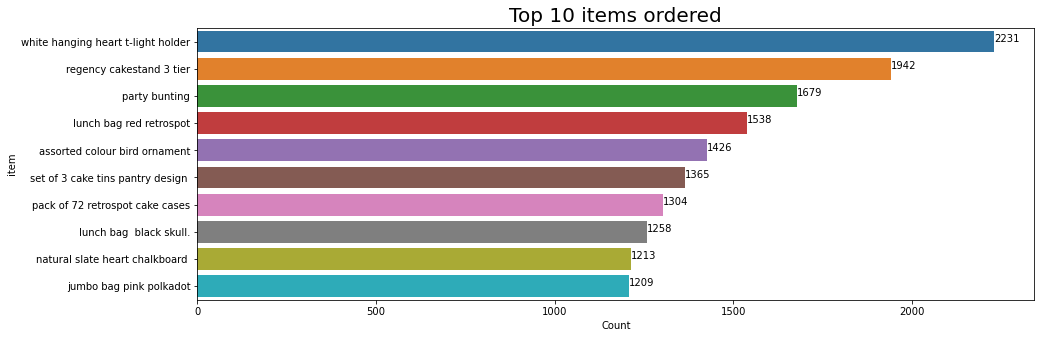

In [71]:
plt.figure(figsize=(15,5))

sns.barplot(x='num_purchases',y='item', data=top_ordered)

for i, v in enumerate(top_ordered.num_purchases):
    plt.text(v, i, str(round(v)), color='black')

plt.title("Top 10 items ordered",fontsize=20)
plt.xlabel('Count')
plt.show()

- The most purchased products are first of all products for home use and products related to food preparation and storage.

**Recommendation:** expand the range of products related to home accessories, home kitchen, food packaging solutions.

### Sales by Price_Range

In [72]:
price_range_data = data.groupby('Price_Range').agg({'InvoiceNo':'count','Quantity':'sum','Revenue':'sum'}).reset_index()
price_range_data = price_range_data.rename(columns={'InvoiceNo':'num_purchases'})
price_range_data

,Price_Range,num_purchases,Quantity,Revenue
0,elite,26027,66815,936890.48
1,high,87008,392976,2239804.13
2,high medium,142096,955280,2647086.42
3,low,148001,2706684,1898839.33
4,medium,80058,978842,1624586.84


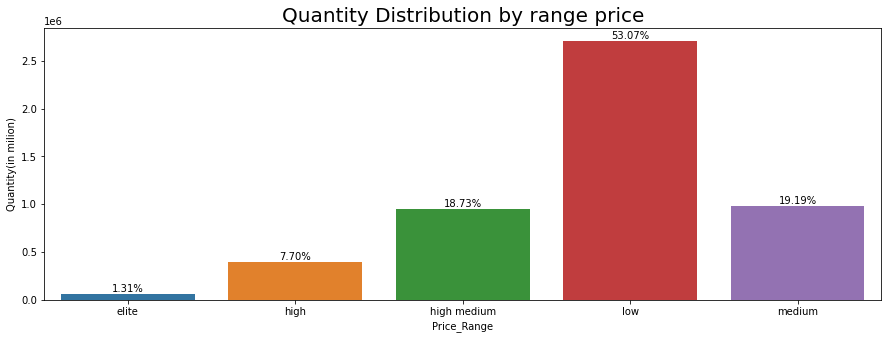

In [73]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='Price_Range',y='Quantity', data=price_range_data)

# adding the ratio number of each price range
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ratio = y / sum(price_range_data['Quantity'])  # Calculate the ratio
    ax.text(x, y, f'{ratio:.2%}', ha='center', va='bottom')


plt.title('Quantity Distribution by range price',fontsize=20)
plt.ylabel('Quantity(in milion)')
plt.show()

## conclusion:

- The results connect with reality, and as a rule you can see that as the price increases, there is a decrease in price (negative correlation).

### Sales by Category

In [74]:
Category_Sales = data.groupby('Category').agg({'InvoiceNo':'count','Quantity':'sum','Revenue':'sum'}).reset_index()
Category_Sales = Category_Sales.rename(columns={'InvoiceNo':'num_purcheses'}).sort_values(by='num_purcheses',ascending=False)

Category_Sales

,Category,num_purcheses,Quantity,Revenue
0,Other,217889,2380192,3932937.33
1,bag,47650,542540,984064.77
8,box,25373,237671,511363.44
26,holder,15631,256457,408523.65
11,card,15320,194537,113954.26
20,decoration,13399,151746,131837.42
6,bottle,10450,67356,281232.38
18,cup,9138,88337,143076.31
22,doormat,7960,47536,315677.68
10,candle,7694,85800,113291.33


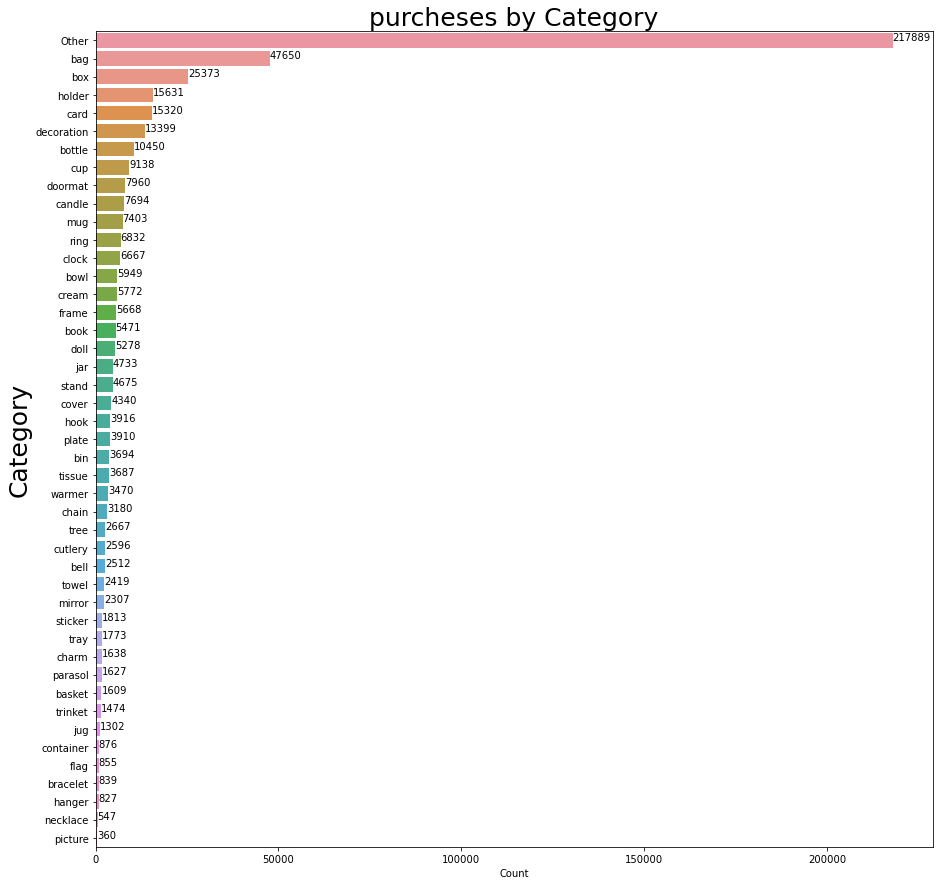

In [75]:
plt.figure(figsize=(15,15))

sns.barplot(x='num_purcheses',y='Category', data=Category_Sales)

for i, v in enumerate(Category_Sales.num_purcheses):
    plt.text(v, i,str(round(v)), color='black')

plt.title("purcheses by Category",fontsize=25)
plt.xlabel('Count')
plt.ylabel('Category',size = 25)
plt.show()

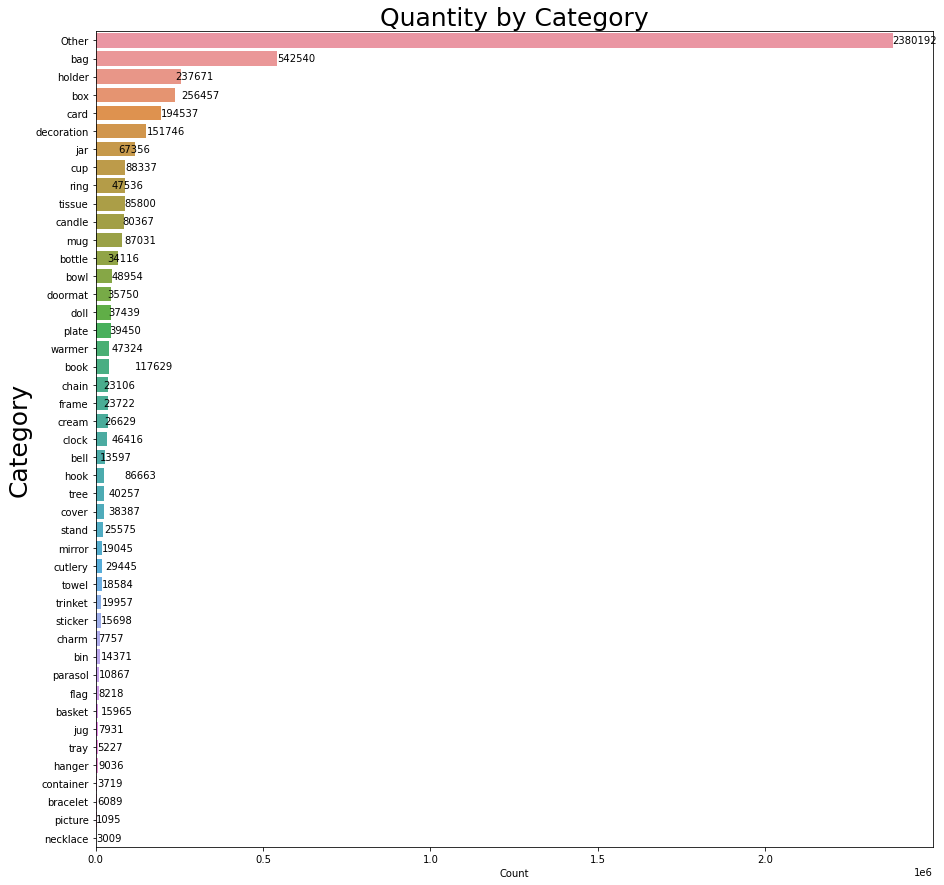

In [76]:
plt.figure(figsize=(15, 15))

# Create the bar plot
ax = sns.barplot(x='Quantity', y='Category', data=Category_Sales.sort_values(by='Quantity', ascending=False))

# Add text annotations
for i, v in enumerate(Category_Sales.Quantity):
    plt.text(v, i, str(round(v)), color='black', ha='left', va='center')

plt.title("Quantity by Category", fontsize=25)
plt.xlabel('Count')
plt.ylabel('Category', size=25)
plt.show()


## Summary:

- The top five (identified) categories in the number of purchases are: bag,	box, holder, card, decoration. (descending order)


- The top five (identified) categories in the quantity are: bag, holder, box, card, decoration. (descending order)

## sales by months

In [77]:
Sales_months = data.groupby('Month').agg({'InvoiceNo':'count','Quantity':'sum','Revenue':'sum'}).reset_index()
Sales_months = Sales_months.rename(columns={'InvoiceNo': 'num_purchases'})

Sales_months

,Month,num_purchases,Quantity,Revenue
0,2018-12,34460,290295,650799.60
1,2019-01,35051,398340,688341.66
2,2019-02,25182,269588,484090.49
3,2019-03,33059,360804,646219.11
4,2019-04,26996,281512,476644.05
5,2019-05,36980,404042,758480.13
6,2019-06,32518,360250,679886.41
7,2019-07,38391,406985,698635.09
8,2019-08,34308,427398,729511.05
9,2019-09,45272,519927,942213.76


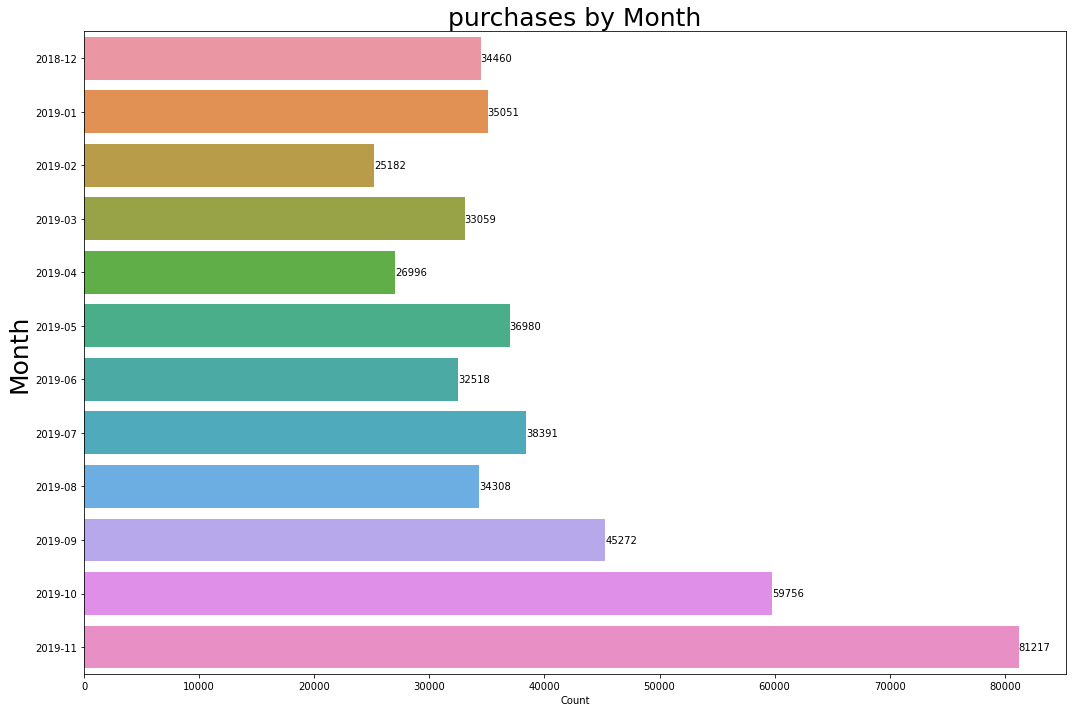

In [78]:
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(x='num_purchases', y='Month', data=Sales_months)

# Add text annotations
for i, v in enumerate(Sales_months.num_purchases):
    plt.text(v, i, str(round(v)), color='black', ha='left', va='center')

plt.title("purchases by Month", fontsize=25)
plt.xlabel('Count')
plt.ylabel('Month', size=25)
plt.tight_layout()
plt.show()

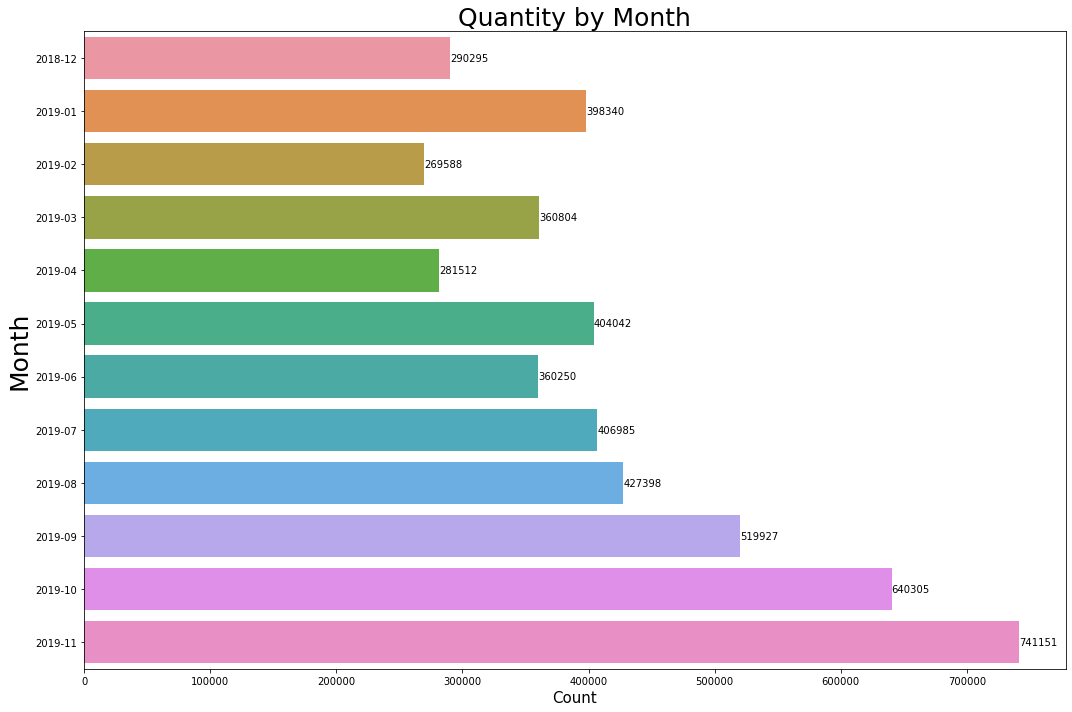

In [79]:
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(x='Quantity', y='Month', data=Sales_months)

# Add text annotations
for i, v in enumerate(Sales_months.Quantity):
    plt.text(v, i, str(round(v)), color='black', ha='left', va='center')

plt.title("Quantity by Month", fontsize=25)
plt.xlabel('Count', size=15)
plt.ylabel('Month', size=25)
plt.tight_layout()
plt.show()

- There is a strong relationship between the number of purchases and the amount of products, the months are almost identical in both histograms.

## Revenue Analysis

### top 10 profit items

In [80]:
top_profit_item = data.groupby('Description')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)[:10]
top_profit_item

,Description,Revenue
2620,regency cakestand 3 tier,165414.75
3561,white hanging heart t-light holder,102435.35
2217,party bunting,98828.59
1871,medium ceramic top storage jar,81492.97
2514,rabbit night light,59266.78
2186,paper chain kit 50's christmas,58273.25
209,assorted colour bird ornament,56524.73
640,chilli lights,51028.95
1640,jumbo bag pink polkadot,41982.52
3201,spotty bunting,41908.80


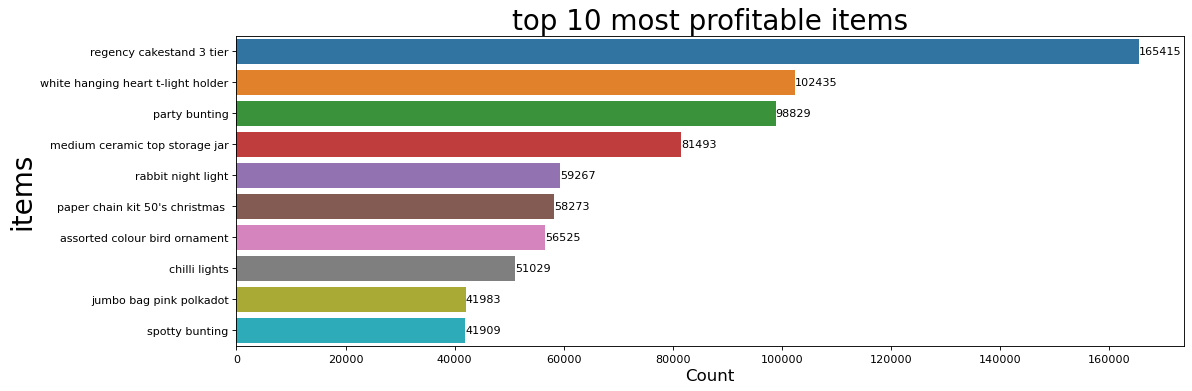

In [81]:
plt.figure(figsize=(15, 5),dpi= 80)

# Create the bar plot
ax = sns.barplot(x='Revenue', y='Description', data=top_profit_item)

# Add text annotations
for i, v in enumerate(top_profit_item.Revenue):
    plt.text(v, i, str(round(v)), color='black', ha='left', va='center')

plt.title("top 10 most profitable items", fontsize=25)
plt.xlabel('Count', size=15)
plt.ylabel('items', size=25)
plt.tight_layout()
plt.show()

- Note: These products do not represent final profit, because it is determined by the cost of the product and operating expenses, which is information that does not exist here

### Revenue by Price_Range

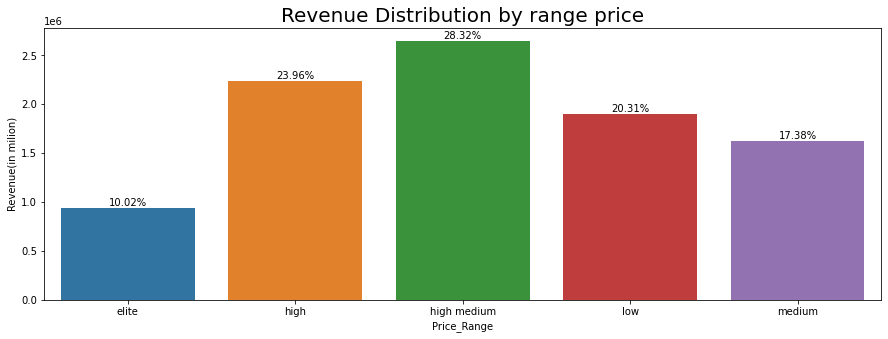

In [82]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='Price_Range',y='Revenue', data=price_range_data)

# adding the ratio number of each price range
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ratio = y / sum(price_range_data['Revenue'])  # Calculate the ratio
    ax.text(x, y, f'{ratio:.2%}', ha='center', va='bottom')


plt.title('Revenue Distribution by range price',fontsize=20)
plt.ylabel('Revenue(in milion)')
plt.show()

- Note: Unlike the quantity and number of purchases, the highest income is actually from the " " category, which means that what is sold more does not necessarily bring the most income.

### Revenue by Category

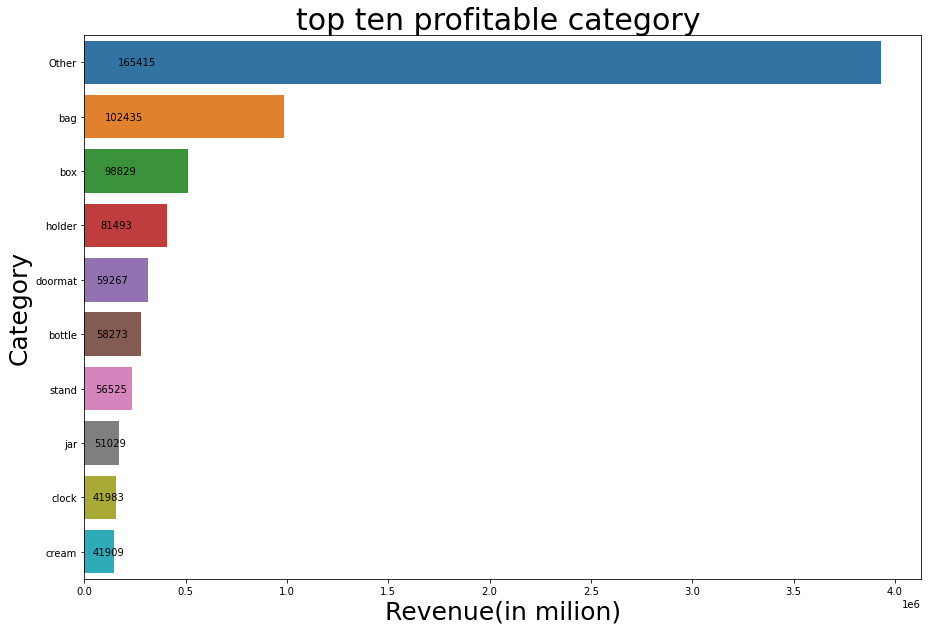

In [83]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Revenue',y='Category', data=Category_Sales.sort_values(by='Revenue',ascending=False).head(10))

for i, v in enumerate(top_profit_item.Revenue):
    plt.text(v, i, str(round(v)), color='black', ha='left', va='center')

plt.title('top ten profitable category ',fontsize=30)
plt.ylabel('Category',size=25)
plt.xlabel('Revenue(in milion)',size=25)
plt.show()

### Revenue by Month

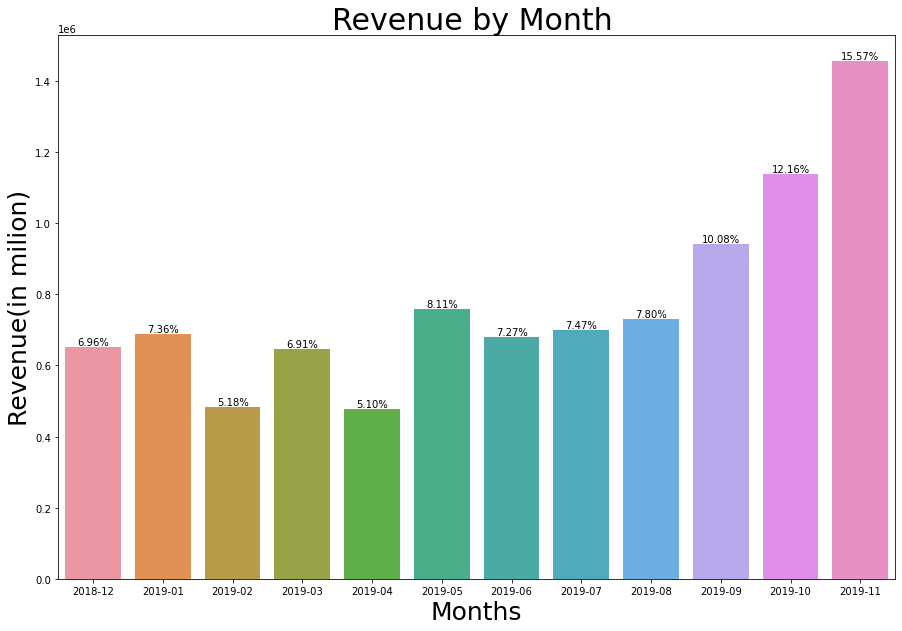

In [84]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Month',y='Revenue', data=Sales_months)

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ratio = y / sum(Sales_months['Revenue'])  # Calculate the ratio
    ax.text(x, y, f'{ratio:.2%}', ha='center', va='bottom')

plt.title('Revenue by Month ',fontsize=30)
plt.ylabel('Revenue(in milion)',size=25)
plt.xlabel('Months',size=25)
plt.show()

- The months of June to August are almost the same, from the month of September there is a serious increase that continues until the month of November which is the peak.

- See also linear graph.

### Revenue by Months

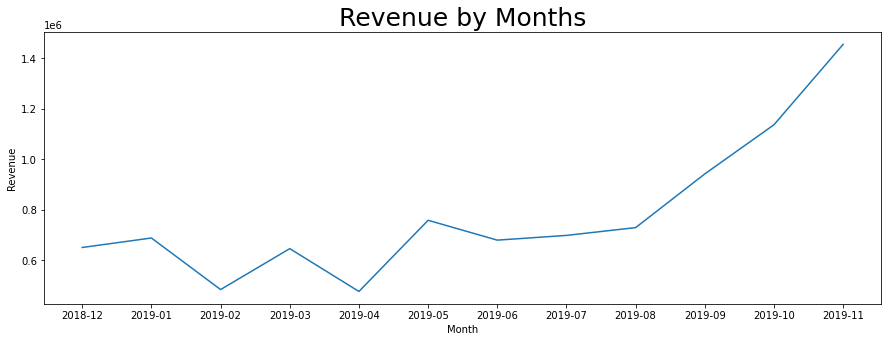

In [85]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=Sales_months, x="Month", y="Revenue")
plt.title("Revenue by Months",size=25)
plt.show()

### Revenue by price range

In [86]:
price_range_data

,Price_Range,num_purchases,Quantity,Revenue
0,elite,26027,66815,936890.48
1,high,87008,392976,2239804.13
2,high medium,142096,955280,2647086.42
3,low,148001,2706684,1898839.33
4,medium,80058,978842,1624586.84


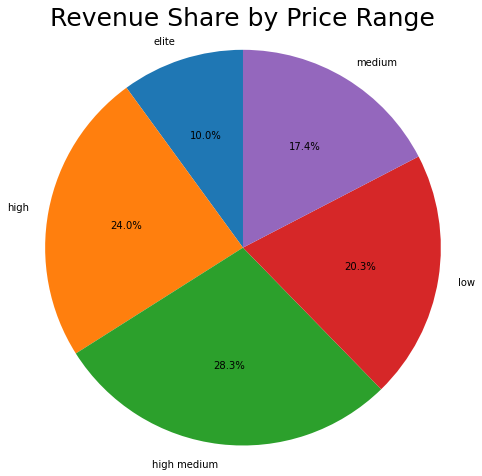

In [87]:
labels = ['elite', 'high', 'high medium', 'low', 'medium']
revenue = [936890.48, 2239804.13, 2647086.42, 1898839.33, 1624586.84]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(revenue, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Price Range',size=25)

plt.axis('equal')
plt.show()

**Recommendation:** expand the range of products whose price belongs to the "high medium" category.

## Returned Products

In [88]:
returned['Quantity'] *= -1
returned['Revenue'] = returned['Quantity'] * returned['UnitPrice']

#the most ten returned product
returned.groupby('Description')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False).head(12)

,Description,InvoiceNo
1093,Manual,244
1399,REGENCY CAKESTAND 3 TIER,180
1305,POSTAGE,126
887,JAM MAKING SET WITH JARS,87
538,Discount,77
1534,SET OF 3 CAKE TINS PANTRY DESIGN,73
1480,SAMPLES,60
1709,STRAWBERRY CERAMIC TRINKET BOX,54
1457,ROSES REGENCY TEACUP AND SAUCER,54
1323,RECIPE BOX PANTRY YELLOW DESIGN,47


"REGENCY CAKESTAND 3 TIER" it's the product that is much addicted so it makes sense that it will also have more cancellation.

In [89]:
print('the share of returned from all dataset is: {:.2%}'.format(len(returned)/len(data)))

the share of returned from all dataset is: 1.91%


In [90]:
print('the sum of money back for returned product is: {:.2f}'.format(returned.Revenue.sum()))

the sum of money back for returned product is: 893979.73


In [91]:
print('the sum of the quntity that returned: {}'.format(returned.Quantity.sum()))
print('the share from all quantity that was sale: {:.2%}'.format(returned.Quantity.sum()/data.Quantity.sum()))

the sum of the quntity that returned: 275560
the share from all quantity that was sale: 5.40%


## Checking hypotheses:

- Differences in avarge unit price between price groups "low" and "medium".

- Differences in avarge unit price between top 2 ordered product.

im going to use in The stats.f_oneway() test, also known as the one-way ANOVA (Analysis of Variance) test, is a statistical test used to determine whether there are significant differences between the means of two or more groups. It assesses whether the variability between group means is greater than the variability within the groups.
its will help me to check those tow hypotheses.

### preparing the data for the tests

In [92]:
avg_rev_group = data.groupby('Price_Range')['UnitPrice'].mean().reset_index()
avg_rev_group

,Price_Range,UnitPrice
0,elite,14.706559
1,high,6.118074
2,high medium,2.923646
3,low,0.824857
4,medium,1.662281


In [93]:
medium = data[data['Price_Range']=='medium']['UnitPrice']
low = data[data['Price_Range']=='low']['UnitPrice']

product1 = data[data['Description']=='white hanging heart t-light holder']['UnitPrice']
product2 = data[data['Description']=='regency cakestand 3 tier']['UnitPrice']

### conducting the test

- Differences in average unit price between price groups "low" and "medium".

**Ho : There is no significant difference between the average of price group "low" and "medium".**

**H1 : There is significant difference between the average of price group "low" and "medium".**

In [94]:
t_statistic, p_value = stats.ttest_ind(low, medium)

print(len(medium), medium.mean())
print(len(low), low.mean())
print('stat=%.3f, p=%.3f' % (t_statistic, p_value))
if p_value < 0.05:
    print('There is no significant difference between the average of price group "low" and "medium".')
else:
    print('There is significant difference between the average of price group "low" and "medium".')
    


80058 1.6622810962038987
148001 0.8248572644780582
stat=-663.172, p=0.000
There is no significant difference between the average of price group "low" and "medium".


we can't reject the null hypothese since the differnces between the avarges are too small. 

- Differences in avarge unit price between top 2 ordered product.

**Ho: There is no significant difference between the average price of the top 2 ordered product.**

**Ho: There is significant difference between the average price of the top 2 ordered product.**


In [95]:
t_statistic, p_value = stats.ttest_ind(product1, product2)

print(len(product1), product1.mean())
print(len(product2), product2.mean())
print('f_statistic = %.3f , p = %.3f' % (t_statistic, p_value))
if p_value < 0.05:
    print("There are significant differences in average income between price groups.")
else:
    print("No significant differences in average income between price groups.")

2231 3.217539220080608
1942 13.949943357363537
f_statistic = -116.953 , p = 0.000
There are significant differences in average income between price groups.


according this we reject the null hypothese since there is significant differences in average income between those two products.

# recomnendation

- expand the range of products related to home accessories, home kitchen, food packaging solutions.

- expand the range of products whose price belongs to the "high medium" category.

## Dashboard

link to the Dashboard: https://public.tableau.com/shared/N4QQYWH63?:display_count=n&:origin=viz_share_link

In [96]:
#loading the new data after all the change i made to new csv file 

#data.to_csv('data.csv',index=False)

## Presentaion
https://drive.google.com/file/d/1DvsuKKA6KwWq1QvUgVONyAlAyibBTvx3/view?usp=sharing